In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = '../data/emg_pilot/'
filename_right_hand_only = "record-[2023.12.04-14.29.07].gdf"

raw = mne.io.read_raw_gdf(data_folder + filename_right_hand_only,
                             preload=True)
raw = raw.drop_channels("Channel 1").pick(["EX 1", "EX 2", "EX 3", "EX 4"])
raw = raw.set_eeg_reference()
raw = raw.set_channel_types(dict.fromkeys(raw.ch_names, "emg"))

raw = raw.filter(1, 300, picks='emg')# .pick(["EX 1", "EX 2", "EX 3", "EX 4"])
raw = raw.notch_filter(np.arange(50, 251, 50), picks='emg')

Extracting EDF parameters from /Users/ivopascal/Documents/PhD/CarDrivingBCI/data/emg_pilot/record-[2023.12.04-14.29.07].gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Channel 1, EX 1, EX 2, EX 3, EX 4, EX 5, EX 6, EX 7, EX 8
Creating raw.info structure...
Reading 0 ... 882815  =      0.000 ...   431.062 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.

EX1: flexion right hand
EX2: flexion left hand
EX3: extension right hand
EX4: extension left hand

Basline duration = 20 sec
Wait for beep duration = 2 sec
Wait for cue duraiton = 1 sec
Display cue duiotoin = 1.25 sec
Feedback duration = 3.75 sec
End of trial minimum duratoin = 1.5 sec
End of trial maximum duraiton = 3.5 sec

In [3]:
raw.ch_names

['EX 1', 'EX 2', 'EX 3', 'EX 4']

In [4]:
left_hand_event = "769"
right_hand_event = "770"

events, _ = mne.events_from_annotations(raw, event_id={left_hand_event: 1, right_hand_event: 2})

Used Annotations descriptions: ['769', '770']


In [190]:
tmin = -1
tmax = 1.25 + 3.75 + 1
# Now we'd expect the movement 1 + 1.25 = 2.25 seconds in the timing may be learned
# It should stay until 6 seconds in. The first and last second should both be "empty"

event_ids = dict(left=1, right=2)
    
epochs = mne.Epochs(
    raw,
    events,
    event_ids,
    tmin - 0.5,
    tmax + 0.5,
    baseline=None,
    preload=True,
)

In [6]:
raw

<RawGDF | record-[2023.12.04-14.29.07].gdf, 4 x 882816 (431.1 s), ~27.0 MB, data loaded>

/var/folders/lm/ht2dkcld0tn4b4c0hqznvyfr0000gn/T/ipykernel_88008/2402845356.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.compute_psd(fmin=0.05, fmax=300, picks='emg').plot(picks='emg')
/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


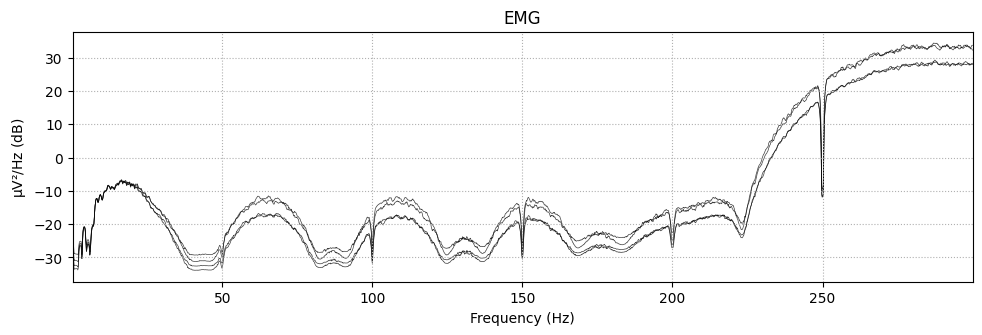

In [192]:
epochs.compute_psd(fmin=0.05, fmax=300, picks='emg').plot(picks='emg')
plt.show()
# Here we see 2 lines that follow very similar distributions, and two that follow the same "other" distribution.
# Possibly that is distinct between "those catch signal" and "those not catching signal"

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


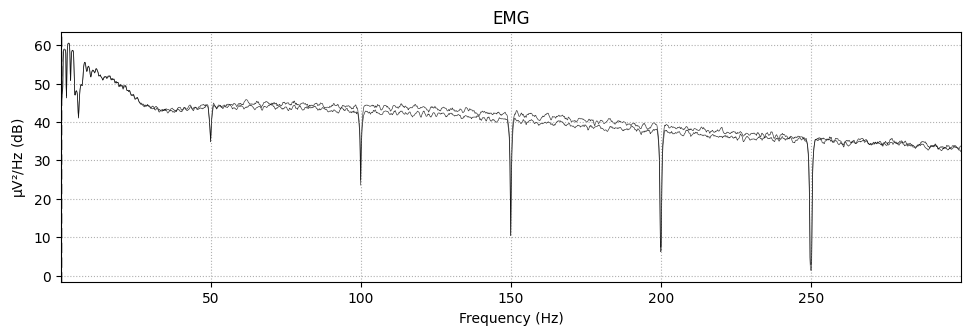

In [8]:
epochs.compute_psd(picks='emg', fmin=0.05, fmax=300).plot(picks=['EX 3', 'EX 4'], spatial_colors=False)

plt.show()

# Above we saw 2 lines that follow very similar distributions, and two that follow the same "other" distribution.
# Looking at only EX3 and EX4 we see that they are similar and distinct from EX1 and EX2. This is clear at the 100-150Hz, where 3&4 are >40 dB while 1&2 <40dB

Using matplotlib as 2D backend.


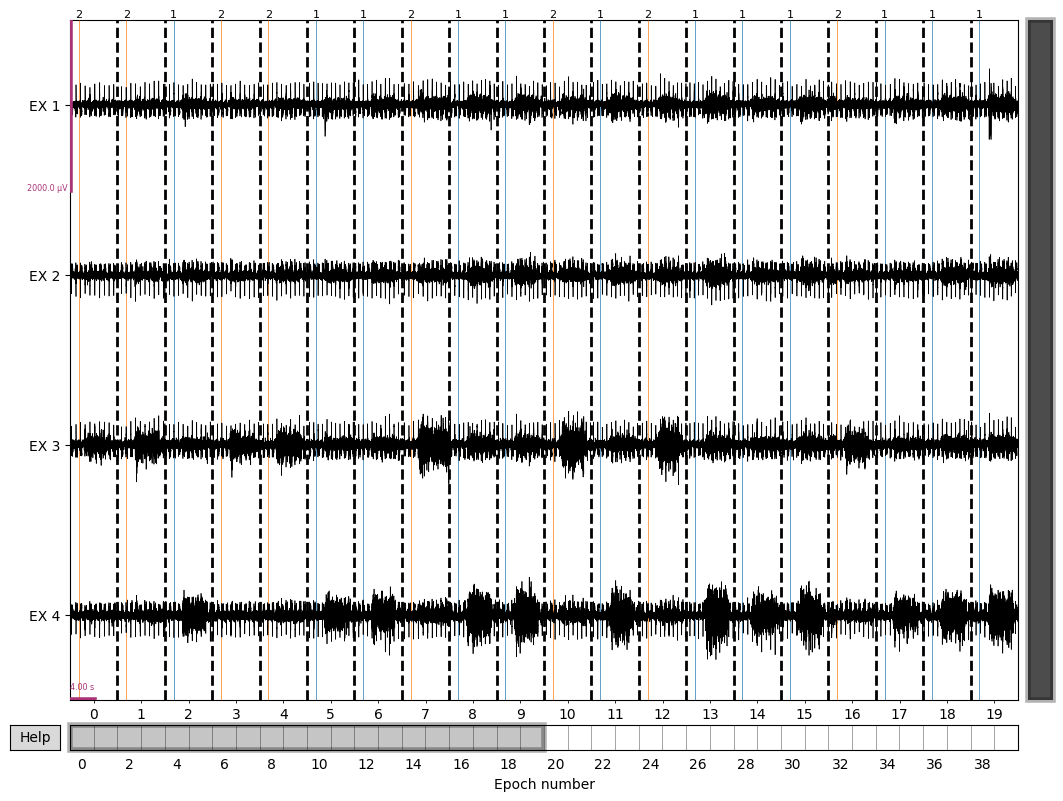

In [9]:
epochs.plot(picks='emg', events=events) 
plt.show()

In [10]:
epoch_psds = epochs.compute_psd(picks='emg', fmin=0.05, fmax=300).get_data(picks='emg')

    Using multitaper spectrum estimation with 7 DPSS windows


In [11]:
epoch_psds.shape # 20 * 2 samples, 4 channels, 2401 samples over the frequencies 0.05 - 300 = 0.125Hz per frequency

(40, 4, 2400)

Not setting metadata


0it [00:00, ?it/s]

<EpochsTFR | time : [-1.500000, 6.500000], freq : [20.000000, 295.000000], epochs : 20, channels : 4, ~280.0 MB>



0it [00:00, ?it/s]

EX 1



1it [00:01,  1.38s/it]

EX 2



2it [00:02,  1.40s/it]

EX 3



3it [00:04,  1.40s/it]

EX 4



4it [00:05,  1.34s/it]
1it [00:05,  5.40s/it]

<EpochsTFR | time : [-1.500000, 6.500000], freq : [20.000000, 295.000000], epochs : 20, channels : 4, ~280.0 MB>



0it [00:00, ?it/s]

EX 1



1it [00:01,  1.23s/it]

EX 2



2it [00:02,  1.24s/it]

EX 3



3it [00:03,  1.16s/it]

EX 4



4it [00:04,  1.21s/it]
2it [00:10,  5.14s/it]


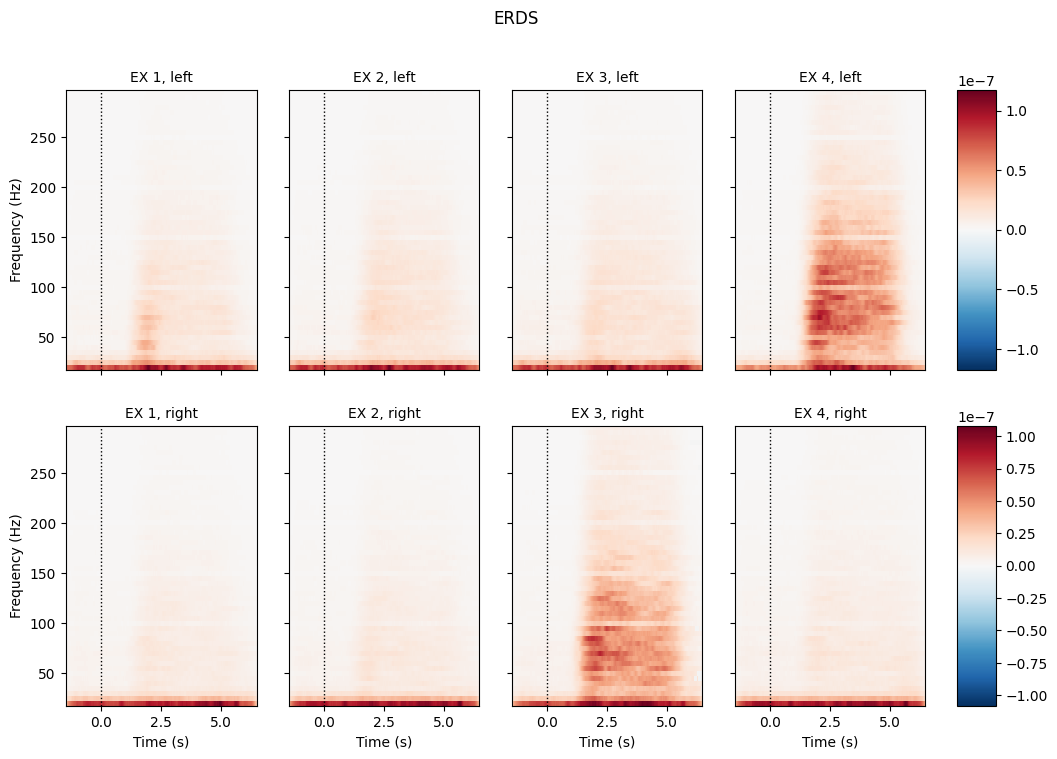

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from tqdm import tqdm

freqs = np.arange(20, 300, 5) 
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot, visualisation only
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=20, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test
baseline = (-1, 1)  # baseline interval (in s)
channel_names = ["EX 1", "EX 2", "EX 3", "EX 4"]
tfr = tfr_multitaper(
    epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
    picks=channel_names,
)
# tfr.apply_baseline(baseline, mode="percent")

mne.set_log_level('warning')
fig, axes = plt.subplots(
    2, 5, figsize=(12, 8), gridspec_kw={"width_ratios": [5, 5, 5, 5, 1]}
)
for event_idx, event in tqdm(enumerate(event_ids)):
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    print(tfr_ev)
    for ch, ax in tqdm(enumerate(axes[event_idx, :-1])):  # for each channel
        # positive clusters
        print(channel_names[ch])
        _, c, p, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        # _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c, axis=2)  # combined clusters
        # p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            channel_names[ch],
            # cmap="RdBu",
            # cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(f"{channel_names[ch]}, {event}", fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
        if event_idx == 0:
            ax.set_xlabel("")
            ax.set_xticklabels("")
    fig.colorbar(axes[event_idx, 0].images[-1], cax=axes[event_idx, -1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS")
plt.show()

In [439]:

filename_right_hand_only = "record-[2023.12.04-14.20.43].gdf"
raw = mne.io.read_raw_gdf(data_folder + filename_right_hand_only,
                             preload=True)
raw = raw.drop_channels("Channel 1").pick(["EX 1", "EX 2", "EX 3", "EX 4"])
raw = raw.set_eeg_reference()
raw = raw.set_channel_types(dict.fromkeys(raw.ch_names, "emg"))

raw = raw.notch_filter(np.arange(50, 501, 50), picks='emg', method='fir', phase='minimum') # Multiple notches only implemented for FIR

raw_band = raw.filter(30, 500, picks='emg', method='iir', phase='forward')
events, _ = mne.events_from_annotations(raw, event_id={left_hand_event: 1, right_hand_event: 2})
raw_band

<RawGDF | record-[2023.12.04-14.20.43].gdf, 4 x 882784 (431.0 s), ~26.9 MB, data loaded>

In [440]:
cue_time = 1.25
move_time = 3.75

epochs_band = mne.Epochs(
    raw_band,
    events,
    event_ids,
    cue_time,
    cue_time + move_time,
    baseline=None,
    preload=True,
)

/var/folders/lm/ht2dkcld0tn4b4c0hqznvyfr0000gn/T/ipykernel_88008/3316332213.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs_band.compute_psd(fmin=0.05, fmax=1023, picks='emg').plot(picks='emg')
/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


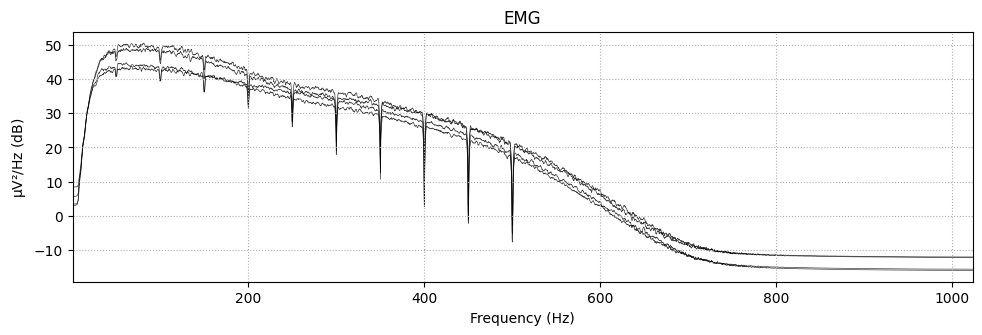

In [441]:
epochs_band.compute_psd(fmin=0.05, fmax=1023, picks='emg').plot(picks='emg')
plt.show()

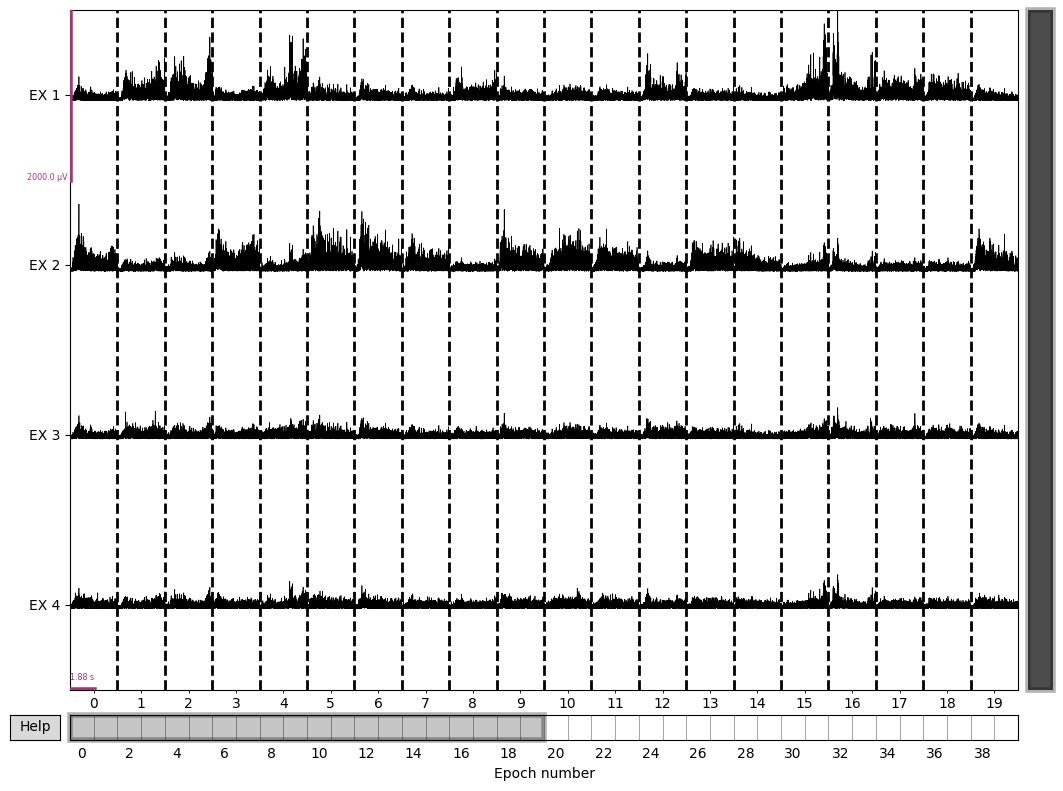

In [442]:
hilbert_epochs = epochs_band.apply_hilbert(envelope=True, picks='emg')
hilbert_epochs.plot(picks='emg',  events=events)
plt.show()

In [443]:
X = hilbert_epochs.get_data()
X.shape

(40, 4, 7681)

In [444]:
y = hilbert_epochs.events[:, -1] - 1

In [445]:
y

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [446]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.75)
print(X_train.shape)


(10, 4, 7681)


In [447]:
X_train_mean = X_train.mean(axis=2)
X_test_mean = X_test.mean(axis=2)

In [448]:
from sklearn.linear_model import LogisticRegression

In [449]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
for i in range(4):
    model.fit(X_train.mean(axis=2)[:, i].reshape(-1, 1), y_train)
    print(f"Performance using only EX {i + 1}")
    print(classification_report(y_test, model.predict(X_test.mean(axis=2)[:, i].reshape(-1, 1))))



Performance using only EX 1
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Performance using only EX 2
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Performance using only EX 3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.43      1.00      0.60        13

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30 

/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivopascal/.local/share/virtualenvs/CarDrivingBCI-DCN7bFty/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [450]:
offset = 0
model = LDA()
model.fit(X_train.mean(axis=2)[:, offset::2], y_train)
print(f"Performance using EX {offset + 1} and {offset + 3}")
print(classification_report(y_test, model.predict(X_test.mean(axis=2)[:, offset::2])))


Performance using EX 1 and 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [451]:
model = LDA()
model.fit(X_train.mean(axis=2), y_train)
print(f"Performance using all channels")
print(classification_report(y_test, model.predict(X_test.mean(axis=2))))

Performance using all channels
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



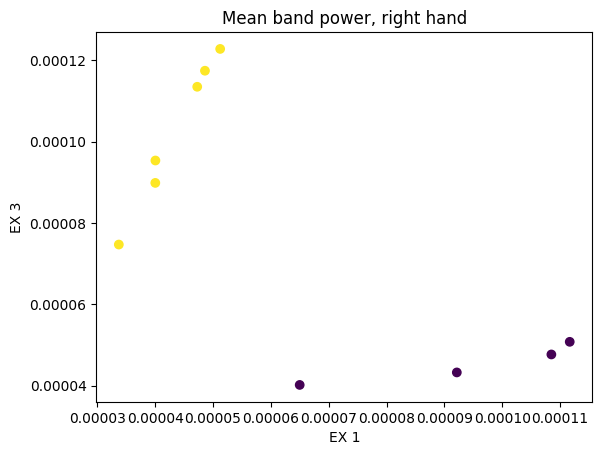

In [372]:
x_channel = 0
y_channel = 2

plt.scatter(X_train.mean(axis=2)[:, x_channel], X_train.mean(axis=2)[:, y_channel], c=y_train)
plt.title("Mean band power, right hand")
plt.xlabel(f"EX {x_channel + 1}")
plt.ylabel(f"EX {y_channel + 1}")
plt.show()

In [ ]:
print(X_train_mean[y_train==0].mean(axis=0)) # Here clearly idx 3 is highest
print(X_train_mean[y_train==1].mean(axis=0)) # Here clearly idx 2 is highest


In [ ]:
X_train_mean.mean(axis=0).shape

In [ ]:
eX_train_mean[y_train==1].mean(axis=0).argmax()

In [ ]:
X_train.mean(axis=2)